## K-Nearest Neighbor(최근접 이웃)
+ 특별한 예측모델 없이 가장 가까운 데이터 포인터를 기반으로 예측하는 방법
+ 분류, 회귀 모두 지원

In [73]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [74]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## KNeighborsClassifier
+ 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트 출력
+ k개의 데이터 포인터 중 가장 많은 클래스가 예측 결과가 됨

In [75]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [76]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9583333333333334
평가데이터 점수 : 0.9666666666666667


In [77]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())

cross_validate(estimator=KNeighborsClassifier(),
               X=X, y=y, cv=10, verbose=True,
               n_jobs=multiprocessing.cpu_count())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    1.9s finished


{'fit_time': array([0.00099921, 0.        , 0.00100088, 0.        , 0.00099969,
        0.00100207, 0.00100279, 0.00100112, 0.        , 0.0010004 ]),
 'score_time': array([0.00100064, 0.00200129, 0.00099993, 0.00199986, 0.00099897,
        0.00199914, 0.00099635, 0.00099921, 0.0010004 , 0.00151849]),
 'test_score': array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ])}

In [78]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights':['uniform', 'distance'],
               'algorithm':['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True, refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best estimator : KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
best score : 0.9800000000000001
best params : {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}


In [79]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


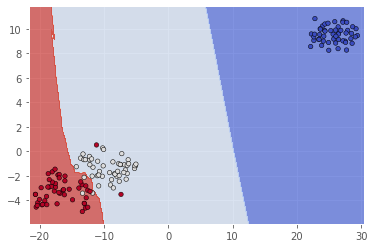

In [80]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)

y_pred = model.predict(X_comp)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [81]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [82]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9758241758241758
평가데이터 점수 : 0.9824561403508771


In [83]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())

cross_validate(estimator=estimator,
               X=X, y=y, cv=10, verbose=True,
               n_jobs=multiprocessing.cpu_count())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


{'fit_time': array([0.00100136, 0.00100398, 0.00100398, 0.00200462, 0.00100064,
        0.00200105, 0.00199962, 0.00159788, 0.00159788, 0.00255275]),
 'score_time': array([0.00300503, 0.00430727, 0.00359893, 0.00355315, 0.00355315,
        0.00355458, 0.00255537, 0.0019567 , 0.00295424, 0.00300193]),
 'test_score': array([0.98245614, 0.96491228, 0.92982456, 0.98245614, 1.        ,
        0.96491228, 0.94736842, 0.96491228, 0.94736842, 0.98214286])}

In [84]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights':['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True, refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])
best score : 0.9701288619779538
best params : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


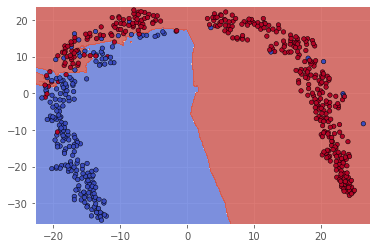

In [85]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)

y_pred = model.predict(X_comp)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [86]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [87]:
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9647887323943662
평가데이터 점수 : 0.9722222222222222


In [88]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsClassifier())

cross_validate(estimator=estimator,
               X=X, y=y, cv=10, verbose=True,
               n_jobs=multiprocessing.cpu_count())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.1s finished


{'fit_time': array([0.00100017, 0.00200081, 0.00100064, 0.00100064, 0.002002  ,
        0.00198984, 0.00099707, 0.00100088, 0.0010004 , 0.0010004 ]),
 'score_time': array([0.002002  , 0.00100136, 0.00199938, 0.00100136, 0.00099802,
        0.00100088, 0.00100088, 0.0010004 , 0.00099945, 0.00099945]),
 'test_score': array([1.        , 0.94444444, 0.94444444, 0.94444444, 1.        ,
        0.94444444, 1.        , 1.        , 0.94117647, 0.94117647])}

In [89]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights':['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True, refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])
best score : 0.9665079365079364
best params : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


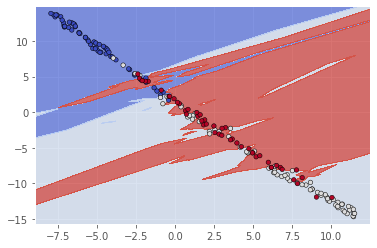

In [90]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)

y_pred = model.predict(X_comp)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## KNeighborsRegressor
+ 이웃 데이터 포인트의 평균이 예측 결과가 됨

In [91]:
boston = load_boston()

df= pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['target'] = boston.target

df

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [107]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsRegressor()
model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.8141069997805713
평가데이터 점수 : 0.8169864555684141


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


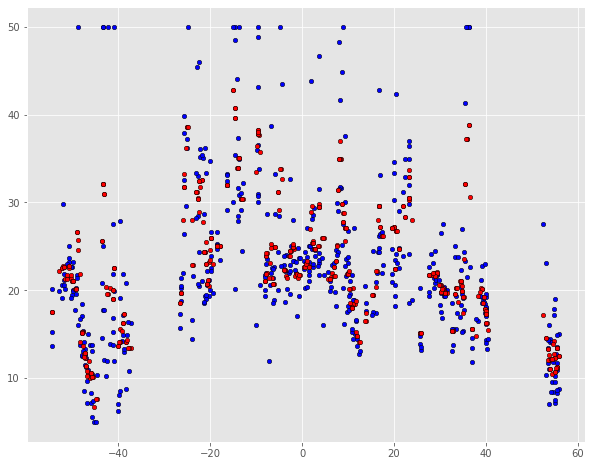

In [108]:
X_comp = TSNE(n_components=1).fit_transform(X)

model = KNeighborsRegressor()
model.fit(X_comp, y)
y_pred = model.predict(X_comp)

fig = plt.figure(figsize=(10,8))
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, 
            s=20, edgecolors='k')
plt.scatter(X_comp, y_pred, c='r', cmap=plt.cm.coolwarm,
            s=20, edgecolors='k');

In [93]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsRegressor())

cross_validate(estimator=estimator,
               X=X, y=y, cv=10, verbose=True,
               n_jobs=multiprocessing.cpu_count())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


{'fit_time': array([0.00156975, 0.00098538, 0.00198698, 0.0010016 , 0.00200129,
        0.00200129, 0.00200152, 0.00200152, 0.00200176, 0.00100183]),
 'score_time': array([0.0010016 , 0.0010016 , 0.00099969, 0.00200152, 0.00100183,
        0.00200176, 0.00099993, 0.00099993, 0.00099587, 0.00099993]),
 'test_score': array([ 0.57349344,  0.57732981, -0.13857862,  0.29386166,  0.64104266,
         0.58266858,  0.53526567,  0.43433866, -0.29496766,  0.31446342])}

In [109]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

param_grid = [{'model__n_neighbors':[3,5,12,20],
               'model__weights':[None,'uniform', 'distance'],
               'model__algorithm':[None,'ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True, refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=12,
                                     weights='distance'))])
best score : 0.5250021522494536
best params : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 12, 'model__weights': 'distance'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


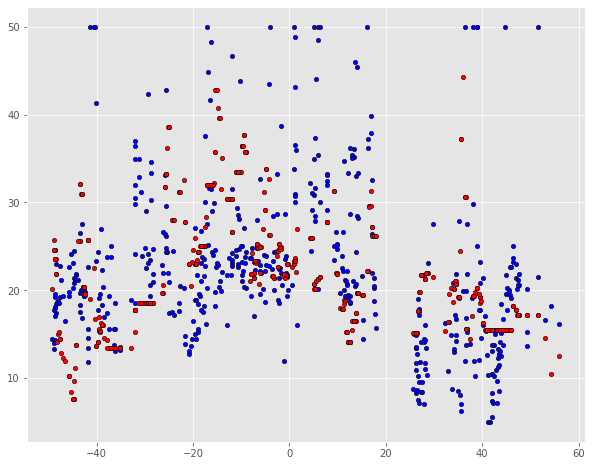

In [110]:
X_comp = TSNE(n_components=1).fit_transform(X)

gs.best_estimator_.fit(X_comp, y)
y_pred = model.predict(X_comp)

fig = plt.figure(figsize=(10,8))
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, 
            s=20, edgecolors='k')
plt.scatter(X_comp, y_pred, c='r', cmap=plt.cm.coolwarm,
            s=20, edgecolors='k');

In [97]:
cali = fetch_california_housing()

df = pd.DataFrame(data=cali.data)
df['target'] = cali.target

df

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [111]:
X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsRegressor()
model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.7932901961669783
평가데이터 점수 : 0.6843835980053483


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


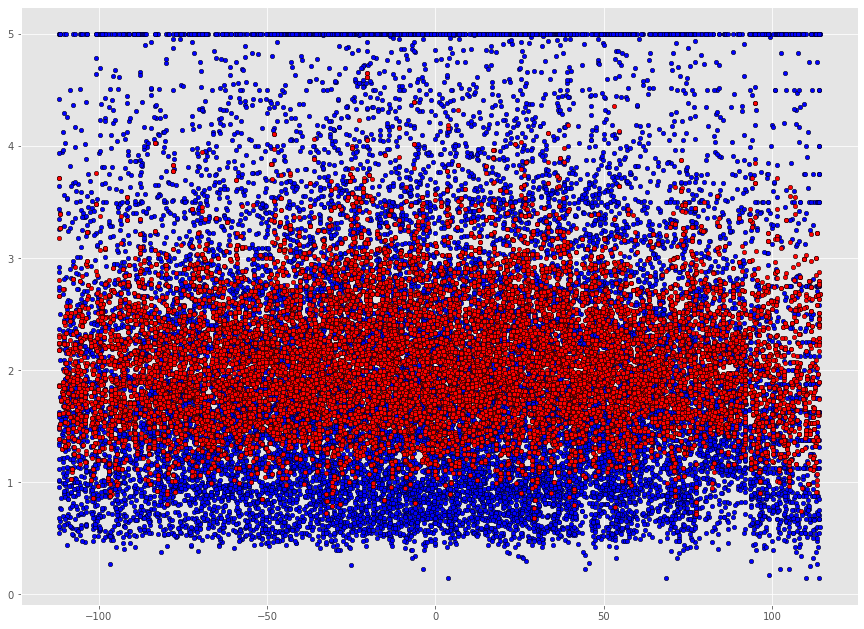

In [112]:
X_comp = TSNE(n_components=1).fit_transform(X)

model = KNeighborsRegressor()
model.fit(X_comp, y)
y_pred = model.predict(X_comp)

fig = plt.figure(figsize=(15,11))
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, 
            s=20, edgecolors='k')
plt.scatter(X_comp, y_pred, c='r', cmap=plt.cm.coolwarm,
            s=20, edgecolors='k');

In [113]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsRegressor())

cross_validate(estimator=estimator,
               X=X, y=y, cv=10, verbose=True,
               n_jobs=multiprocessing.cpu_count())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    3.9s finished


{'fit_time': array([0.11125731, 0.1589973 , 0.12700057, 0.10000277, 0.10200167,
        0.13700318, 0.1050024 , 0.10299325, 0.09300613, 0.10701251]),
 'score_time': array([0.39400196, 0.60053539, 0.28199959, 0.27999592, 0.31700015,
        0.48000002, 0.36700034, 0.31251669, 0.36599803, 0.33599019]),
 'test_score': array([0.21742013, 0.67938059, 0.51926051, 0.47730053, 0.60903506,
        0.55878279, 0.36729332, 0.4422147 , 0.30176353, 0.62048907])}

In [114]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

param_grid = [{'model__n_neighbors':[3,7,12,20,30,50],
               'model__weights':['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True, refit=True)

gs.fit(X, y)

print(f'best estimator : {gs.best_estimator_}')
print(f'best score : {gs.best_score_}')
print(f'best params : {gs.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=30,
                                     weights='distance'))])
best score : 0.5565664565349628
best params : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 30, 'model__weights': 'distance'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


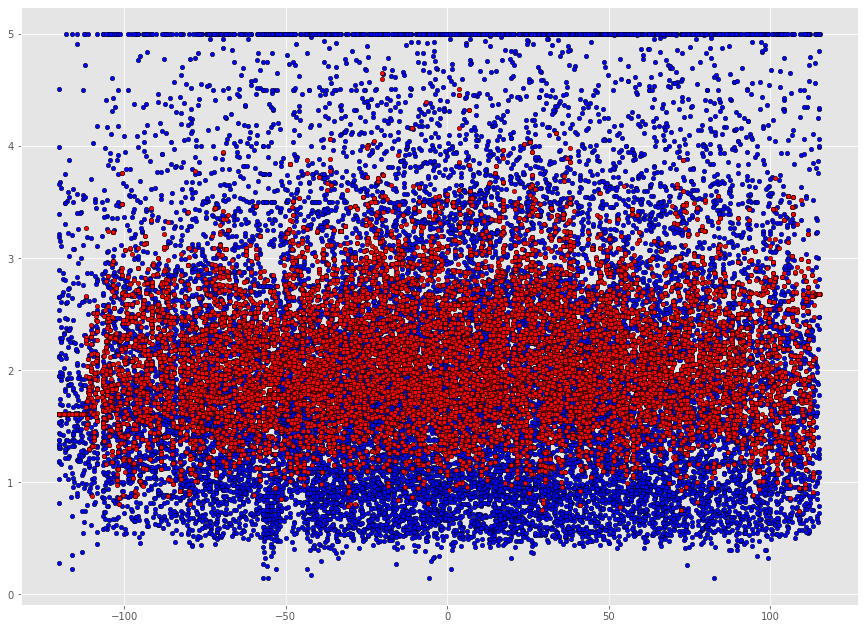

In [115]:
X_comp = TSNE(n_components=1).fit_transform(X)

gs.best_estimator_.fit(X_comp, y)
y_pred = model.predict(X_comp)

fig = plt.figure(figsize=(15,11))
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, 
            s=20, edgecolors='k')
plt.scatter(X_comp, y_pred, c='r', cmap=plt.cm.coolwarm,
            s=20, edgecolors='k');